# Capstone Project (UK Data, ver2, Effect of Junctions)

## Load Libraries and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Kaagle_Upload.csv')
print(df.shape)
df.head()


(285331, 70)


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0,55) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,accident_index,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location-restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,...,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,201506E098757,2,9,0,18,0,8,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201506E098766,1,9,0,9,0,8,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201506E098766,2,9,0,18,0,8,0,0,0,...,8.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0,3.0
3,201506E098777,1,20,0,4,0,0,0,0,0,...,6.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4,201506E098780,1,9,0,15,0,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# feature selection. First dataframe does not have junction features, second one does
df1 = df[['accident_severity', 'road_type', 'light_conditions', 'weather_conditions', 'road_surface_conditions', 'special_conditions_at_site', 'carriageway_hazards', 'urban_or_rural_area', 'day_of_week']]
df2 = df[['accident_severity', 'road_type', 'junction_detail', 'junction_control', 'light_conditions', 'weather_conditions', 'road_surface_conditions', 'special_conditions_at_site', 'carriageway_hazards', 'urban_or_rural_area', 'day_of_week']]

print(df1.shape)
print(df2.shape)

(285331, 9)
(285331, 11)


In [4]:
# drop missing values in dataframe; -1 in the dataset denotes missing value, hence it is replaced with NaN
df1.replace(-1, np.nan, inplace=True)
df1=df1.dropna()
print(df1.shape)

df2.replace(-1, np.nan, inplace=True)
df2=df2.dropna()
print(df2.shape)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


(284654, 9)
(172125, 11)


In [5]:
# import libraries for heatmap
import seaborn as sns
import matplotlib.pyplot as plt


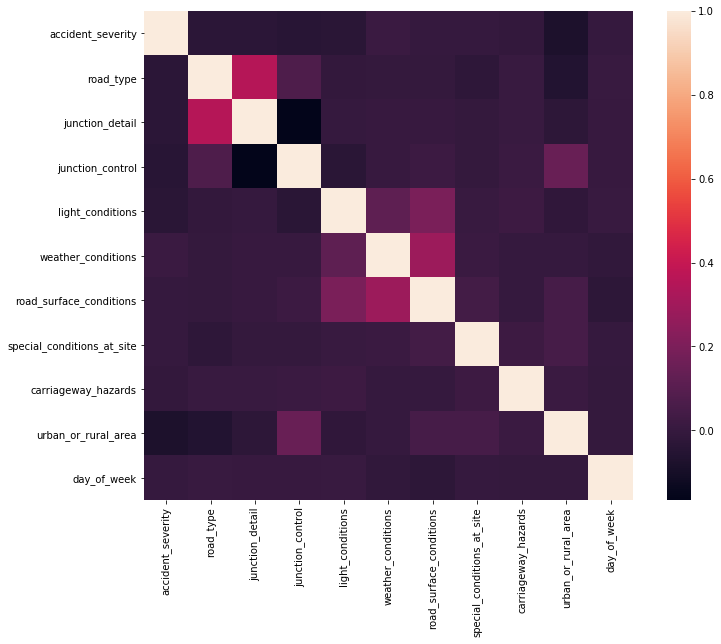

In [6]:
# heatmap is generated to determine correlation between different attributes

corrmat = df2.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=1, square=True)
plt.show()

The heatmap produced shows the linear correlation between attributes. A dark purple cell indicates 0 correlation between 2 attributes, while a white cell indicates perfect correlation. From the heatmap we can see that there are no positive linear correlation present apart from light_conditions, weather_conditions and road_surface_conditions. These make sense as whether it rains or not will directly affect the road conditions.There is not much correlation between any of the other attributes, therefore there is no need for machine learning models based on linearity. 

Another thing to note is that there are no numerical variables, so therefore no normalization required

In [7]:
#limiting size of dataset to reduce time. dataframes 1 and 2 will be used to train the model, dataframes a and b will be used to finally test the model
df_a = df1[12000:24000]
df_b = df2[12000:24000]
df1 = df1[:12000]
df2 = df2[:12000]
print(df_a.shape)
print(df_b.shape)
print(df1.shape)
print(df2.shape)

(12000, 9)
(12000, 11)
(12000, 9)
(12000, 11)


In [8]:
# splitting data into X and Y values
X1 = df1.loc[:, df1.columns != 'accident_severity']
Y1 = df1.accident_severity.values

X2 = df2.loc[:, df2.columns != 'accident_severity']
Y2 = df2.accident_severity.values

print(Y1)
print(Y2)


[3 3 3 ... 3 3 3]
[3 3 3 ... 3 3 3]


In [9]:
# import sklearn libraries for ML
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [10]:
# train test split to evaluate best settings for model
X_train1, X_test1,Y_train1,Y_test1 = train_test_split(X1, Y1, test_size=0.2, random_state=99)


In [11]:
# K Nearest Neighbors
Ks = 11
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
accuracy_scoreKNN1 = [];
for n in range(1,Ks):
    #Train Model and predict
    neigh1 = KNeighborsClassifier(n_neighbors = n).fit(X_train1, Y_train1)
    yhatKNN1 = neigh1.predict(X_test1)
    print("Test accuracy at k=", n, ':', metrics.accuracy_score(Y_test1, yhatKNN1))
    accuracy_scoreKNN1.append(metrics.accuracy_score(Y_test1, yhatKNN1))

Test accuracy at k= 1 : 0.86375
Test accuracy at k= 2 : 0.8225
Test accuracy at k= 3 : 0.8841666666666667
Test accuracy at k= 4 : 0.87125
Test accuracy at k= 5 : 0.8766666666666667
Test accuracy at k= 6 : 0.8741666666666666
Test accuracy at k= 7 : 0.8841666666666667
Test accuracy at k= 8 : 0.87375
Test accuracy at k= 9 : 0.8854166666666666
Test accuracy at k= 10 : 0.88375


Text(0, 0.5, 'Value of the accuracy score')

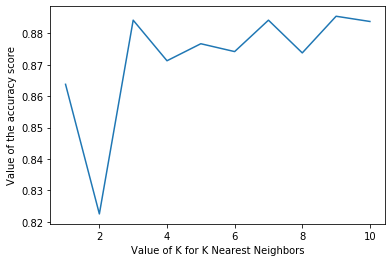

In [12]:
# K Nearest Neighbors evaluation
plt.plot(range(1, Ks), accuracy_scoreKNN1)
plt.xlabel('Value of K for K Nearest Neighbors')
plt.ylabel('Value of the accuracy score')

In [13]:
# since k = 9 gives the largest accuracy value, it will be used in the model
KNN1 = KNeighborsClassifier(n_neighbors=9).fit(X1,Y1)
KNN1

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [14]:
# Decision Tree
#compare accuracy results for different maximum depths
d_range = range(3, 11)
accuracy_scoreDec1 = [];
for d in d_range:
    DecTree1 = DecisionTreeClassifier(criterion='entropy', max_depth=d)
    DecTree1.fit(X_train1, Y_train1)
    yhatDec1 = DecTree1.predict(X_test1)
    print("For a maximum depth value of ", d, "The accuracy score is: ", metrics.accuracy_score(Y_test1, yhatDec1))
    accuracy_scoreDec1.append(metrics.accuracy_score(Y_test1, yhatDec1))

For a maximum depth value of  3 The accuracy score is:  0.8875
For a maximum depth value of  4 The accuracy score is:  0.8870833333333333
For a maximum depth value of  5 The accuracy score is:  0.8870833333333333
For a maximum depth value of  6 The accuracy score is:  0.8870833333333333
For a maximum depth value of  7 The accuracy score is:  0.88375
For a maximum depth value of  8 The accuracy score is:  0.8858333333333334
For a maximum depth value of  9 The accuracy score is:  0.8875
For a maximum depth value of  10 The accuracy score is:  0.8858333333333334


Text(0, 0.5, 'Accuracy score')

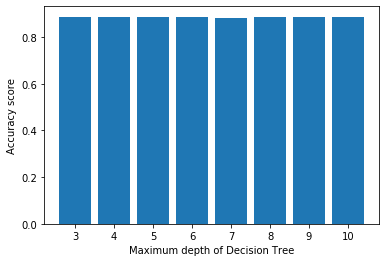

In [15]:
plt.bar(range(3,11), accuracy_scoreDec1)
plt.xlabel('Maximum depth of Decision Tree')
plt.ylabel('Accuracy score')

In [16]:
#Set up the algorithm for max depth = 9
from sklearn.tree import DecisionTreeClassifier
DecTree1 = DecisionTreeClassifier(criterion='entropy', max_depth=9)
DecTree1.fit(X1, Y1)
DecTree1

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [17]:
# Support Vector Machine
from sklearn import svm
kernel_list = ['linear', 'poly', 'rbf', 'sigmoid']
accuracy_scoreSVM1 = [];

for kernel in kernel_list:
    testSVM1 = svm.SVC(kernel=kernel)
    testSVM1.fit(X_train1, Y_train1)
    yhatSVM1 = testSVM1.predict(X_test1)
    print("for the", kernel, "kernel the accuracy score is: ", metrics.accuracy_score(Y_test1, yhatSVM1))
    accuracy_scoreSVM1.append(metrics.accuracy_score(Y_test1, yhatSVM1))

for the linear kernel the accuracy score is:  0.8870833333333333
for the poly kernel the accuracy score is:  0.8870833333333333
for the rbf kernel the accuracy score is:  0.8870833333333333
for the sigmoid kernel the accuracy score is:  0.8125


Text(0, 0.5, 'accuracy score')

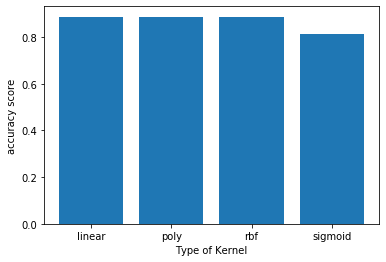

In [18]:
plt.bar(kernel_list, accuracy_scoreSVM1)
plt.xlabel('Type of Kernel')
plt.ylabel('accuracy score')

In [19]:
# linear, poly, and rbf kernels produce the same accuracy, chose rbf to be used in algorithm
SVM1 = svm.SVC(kernel='linear')
SVM1.fit(X1,Y1)
SVM1

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [20]:
# Logistic Regression
from sklearn.metrics import log_loss

#list out variables for c and solver
c_list = [0.1, 0.01, 0.001, 0.0001]
solver_list = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
accuracy_scoreLR1 = []

for c in c_list:
    for solver in solver_list:
        testLR1 = LogisticRegression(C=c, solver=solver).fit(X_train1, Y_train1)
        yhatLR1 = testLR1.predict(X_test1)
        probLR1 = testLR1.predict_proba(X_test1)
        print("Accuracy with parameters c: ",c, "and solver:", solver, "is: ", log_loss(Y_test1, probLR1))
        accuracy_scoreLR1.append(log_loss(Y_test1, probLR1))

Accuracy with parameters c:  0.1 and solver: newton-cg is:  0.37512139423308355


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy with parameters c:  0.1 and solver: lbfgs is:  0.37507485178546524
Accuracy with parameters c:  0.1 and solver: liblinear is:  0.37908947072691934


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy with parameters c:  0.1 and solver: sag is:  0.3747998760333114


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy with parameters c:  0.1 and solver: saga is:  0.37479804317027665
Accuracy with parameters c:  0.01 and solver: newton-cg is:  0.3747202078780941


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy with parameters c:  0.01 and solver: lbfgs is:  0.3747272189008164
Accuracy with parameters c:  0.01 and solver: liblinear is:  0.3858644052690114


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy with parameters c:  0.01 and solver: sag is:  0.37472101432928206


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy with parameters c:  0.01 and solver: saga is:  0.3747882281766806
Accuracy with parameters c:  0.001 and solver: newton-cg is:  0.3746067794482081
Accuracy with parameters c:  0.001 and solver: lbfgs is:  0.3746071097326741
Accuracy with parameters c:  0.001 and solver: liblinear is:  0.3964225251569337
Accuracy with parameters c:  0.001 and solver: sag is:  0.37460678022025123
Accuracy with parameters c:  0.001 and solver: saga is:  0.3746066577137551
Accuracy with parameters c:  0.0001 and solver: newton-cg is:  0.37429049461410613
Accuracy with parameters c:  0.0001 and solver: lbfgs is:  0.37429050967541505
Accuracy with parameters c:  0.0001 and solver: liblinear is:  0.4416580474226054
Accuracy with parameters c:  0.0001 and solver: sag is:  0.3742904216566972
Accuracy with parameters c:  0.0001 and solver: saga is:  0.37429006665064607


In [21]:
#values with the highest accuracy are c=0.0001, solver=liblinear
LR1 = LogisticRegression(C=0.0001, solver='liblinear').fit(X1, Y1)
LR1

LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
#Train test split for df2
X_train2, X_test2,Y_train2,Y_test2 = train_test_split(X2, Y2, test_size=0.2, random_state=99)


In [23]:
# K Nearest Neighbors for df2
Ks = 11
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
accuracy_scoreKNN2 = [];
for n in range(1,Ks):
    #Train Model and predict
    neigh2 = KNeighborsClassifier(n_neighbors = n).fit(X_train2, Y_train2)
    yhatKNN2 = neigh2.predict(X_test2)
    print("Test accuracy at k=", n, ':', metrics.accuracy_score(Y_test2, yhatKNN2))
    accuracy_scoreKNN2.append(metrics.accuracy_score(Y_test2, yhatKNN2))

Test accuracy at k= 1 : 0.78625
Test accuracy at k= 2 : 0.755
Test accuracy at k= 3 : 0.8820833333333333
Test accuracy at k= 4 : 0.8704166666666666
Test accuracy at k= 5 : 0.88375
Test accuracy at k= 6 : 0.88125
Test accuracy at k= 7 : 0.8916666666666667
Test accuracy at k= 8 : 0.8908333333333334
Test accuracy at k= 9 : 0.8925
Test accuracy at k= 10 : 0.8929166666666667


Text(0, 0.5, 'Value of the accuracy score')

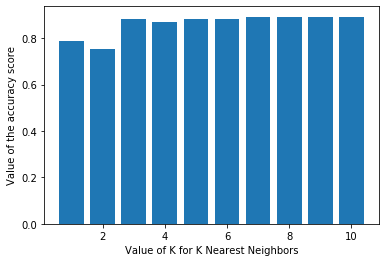

In [24]:
plt.bar(range(1, Ks), accuracy_scoreKNN2)
plt.xlabel('Value of K for K Nearest Neighbors')
plt.ylabel('Value of the accuracy score')

In [25]:
KNN2 = KNeighborsClassifier(n_neighbors=10).fit(X2, Y2)
KNN2

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [26]:
# Decision Tree
#compare accuracy results for different maximum depths
d_range = range(3, 11)
accuracy_scoreDec2 = [];
for d in d_range:
    DecTree2 = DecisionTreeClassifier(criterion='entropy', max_depth=d)
    DecTree2.fit(X_train2, Y_train2)
    yhatDec2 = DecTree2.predict(X_test2)
    print("For a maximum depth value of ", d, "The accuracy score is: ", metrics.accuracy_score(Y_test2, yhatDec2))
    accuracy_scoreDec2.append(metrics.accuracy_score(Y_test2, yhatDec2))

For a maximum depth value of  3 The accuracy score is:  0.8945833333333333
For a maximum depth value of  4 The accuracy score is:  0.8941666666666667
For a maximum depth value of  5 The accuracy score is:  0.895
For a maximum depth value of  6 The accuracy score is:  0.8916666666666667
For a maximum depth value of  7 The accuracy score is:  0.8908333333333334
For a maximum depth value of  8 The accuracy score is:  0.8933333333333333
For a maximum depth value of  9 The accuracy score is:  0.8979166666666667
For a maximum depth value of  10 The accuracy score is:  0.89625


Text(0, 0.5, 'Accuracy score')

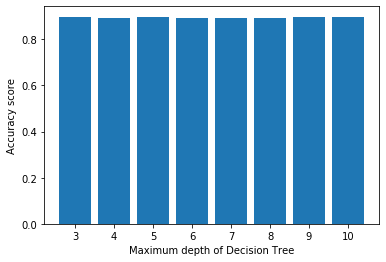

In [27]:
plt.bar(range(3,11), accuracy_scoreDec2)
plt.xlabel('Maximum depth of Decision Tree')
plt.ylabel('Accuracy score')

In [28]:
# max depth of 9 gives the best accuracy
from sklearn.tree import DecisionTreeClassifier
DecTree2 = DecisionTreeClassifier(criterion='entropy', max_depth=9)
DecTree2.fit(X2, Y2)
DecTree2

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [29]:
# Support Vector Machine
kernel_list = ['linear', 'poly', 'rbf', 'sigmoid']
accuracy_scoreSVM2 = [];

for kernel in kernel_list:
    testSVM2 = svm.SVC(kernel=kernel)
    testSVM2.fit(X_train2, Y_train2)
    yhatSVM2 = testSVM2.predict(X_test2)
    print("for the", kernel, "kernel the accuracy score is: ", metrics.accuracy_score(Y_test2, yhatSVM2))
    accuracy_scoreSVM2.append(metrics.accuracy_score(Y_test2, yhatSVM2))

for the linear kernel the accuracy score is:  0.8945833333333333
for the poly kernel the accuracy score is:  0.8941666666666667
for the rbf kernel the accuracy score is:  0.8945833333333333
for the sigmoid kernel the accuracy score is:  0.84125


Text(0, 0.5, 'accuracy score')

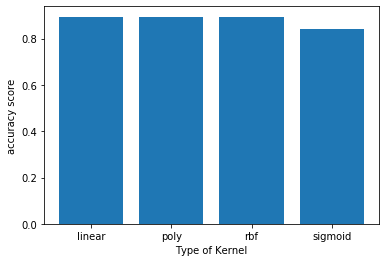

In [30]:
plt.bar(kernel_list, accuracy_scoreSVM2)
plt.xlabel('Type of Kernel')
plt.ylabel('accuracy score')

In [31]:
# rbf has the highest accuracy score
SVM2 = svm.SVC(kernel='linear')
SVM2.fit(X2, Y2)
SVM2

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

#list out variables for c and solver
c_list = [0.1, 0.01, 0.001, 0.0001]
solver_list = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
accuracy_scoreLR2 = []

for c in c_list:
    for solver in solver_list:
        testLR2 = LogisticRegression(C=c, solver=solver).fit(X_train2, Y_train2)
        yhatLR2 = testLR2.predict(X_test2)
        probLR2 = testLR2.predict_proba(X_test2)
        print("Accuracy with parameters c: ",c, "and solver:", solver, "is: ", log_loss(Y_test2, probLR2))
        accuracy_scoreLR2.append(log_loss(Y_test2, probLR2))

Accuracy with parameters c:  0.1 and solver: newton-cg is:  0.34778972827314275


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy with parameters c:  0.1 and solver: lbfgs is:  0.34753823285580965
Accuracy with parameters c:  0.1 and solver: liblinear is:  0.34495460875652045


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy with parameters c:  0.1 and solver: sag is:  0.34757604781010304


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy with parameters c:  0.1 and solver: saga is:  0.3475132470415717
Accuracy with parameters c:  0.01 and solver: newton-cg is:  0.34701838229397824


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy with parameters c:  0.01 and solver: lbfgs is:  0.34704894279493836
Accuracy with parameters c:  0.01 and solver: liblinear is:  0.346097072917091


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy with parameters c:  0.01 and solver: sag is:  0.3470364483373921


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy with parameters c:  0.01 and solver: saga is:  0.34717529389372875
Accuracy with parameters c:  0.001 and solver: newton-cg is:  0.3459632771169045
Accuracy with parameters c:  0.001 and solver: lbfgs is:  0.3459631427199607
Accuracy with parameters c:  0.001 and solver: liblinear is:  0.35297559123379424
Accuracy with parameters c:  0.001 and solver: sag is:  0.3459637713695983


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy with parameters c:  0.001 and solver: saga is:  0.345998893671344
Accuracy with parameters c:  0.0001 and solver: newton-cg is:  0.34424730405141757
Accuracy with parameters c:  0.0001 and solver: lbfgs is:  0.344247296601905
Accuracy with parameters c:  0.0001 and solver: liblinear is:  0.38817041734763147
Accuracy with parameters c:  0.0001 and solver: sag is:  0.3442474607890217
Accuracy with parameters c:  0.0001 and solver: saga is:  0.34424949222456497


In [33]:
# lib linear and c=0.0001 accuracy is the highest
LR2 = LogisticRegression(C=0.0001, solver='liblinear').fit(X2, Y2)
LR2

LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

### Optimum settings have been determined with X1 and X2. Now to use Xa and Xb to determine the accuracy of the models

In [34]:
# splitting data into X and Y values
Xa = df_a.loc[:, df_a.columns != 'accident_severity']
Ya = df_a.accident_severity.values

Xb = df_b.loc[:, df_b.columns != 'accident_severity']
Yb = df_b.accident_severity.values

print(Ya)
print(Yb)

[3 3 3 ... 3 3 3]
[3 3 3 ... 3 3 3]


In [35]:
# inserting data into ML models, then obtain the accuracy score
# Without Junction (df_a)

# K Nearest Neighbors
Y_predKNN_fin1 = KNN1.predict(Xa)
acc_KNN_fin1 = round(KNN1.score(Xa, Ya)*100, 2)
print(acc_KNN_fin1)

# Decision Tree
Y_predDEC_fin1 = DecTree1.predict(Xa)
acc_DEC_fin1 = round(DecTree1.score(Xa, Ya)*100, 2)
print(acc_DEC_fin1)

# Support Vector Machine
Y_pred_SVM_fin1 = SVM1.predict(Xa)
acc_SVM_fin1 = round(SVM1.score(Xa, Ya)*100, 2)
print(acc_SVM_fin1)

# Logistic Regression
Y_pred_LR_fin1 = LR1.predict(Xa)
acc_LR_fin1 = round(LR1.score(Xa, Ya)*100, 2)
print(acc_LR_fin1)

92.96
92.84
93.74
93.74


In [36]:
# inserting data into ML models, then obtain the accuracy score
# With Junction (df_b)

# K Nearest Neighbors
Y_predKNN_fin2 = KNN2.predict(Xb)
acc_KNN_fin2 = round(KNN2.score(Xb, Yb)*100, 2)
print(acc_KNN_fin2)

# Decision Tree
Y_predDEC_fin2 = DecTree2.predict(Xb)
acc_DEC_fin2 = round(DecTree2.score(Xb, Yb)*100, 2)
print(acc_DEC_fin2)

# Support Vector Machine
Y_pred_SVM_fin2 = SVM2.predict(Xb)
acc_SVM_fin2 = round(SVM2.score(Xb, Yb)*100, 2)
print(acc_SVM_fin2)

# Logistic Regression
Y_pred_LR_fin2 = LR2.predict(Xb)
acc_LR_fin2 = round(LR2.score(Xb, Yb)*100, 2)
print(acc_LR_fin2)

91.48
92.48
93.48
93.48


In [37]:
model_score = pd.DataFrame({
    'Machine Learning Model': ['K Nearest Neighbors', 'Decision Tree', 'Support Vector Machine', 'Logistic Regression'],
    'Accuracy Without Junction': [acc_KNN_fin1, acc_DEC_fin1, acc_SVM_fin1, acc_LR_fin1],
    'Accuracy With Junction': [acc_KNN_fin2, acc_DEC_fin2, acc_SVM_fin2, acc_LR_fin2],
})

In [38]:
model_score

,Machine Learning Model,Accuracy Without Junction,Accuracy With Junction
0,K Nearest Neighbors,92.96,91.48
1,Decision Tree,92.84,92.48
2,Support Vector Machine,93.74,93.48
3,Logistic Regression,93.74,93.48
